# ECS 171 Project (Initial NN Model)

# Notes about this process
This was the first iteration of the neural network, which we trained using attributes that we believed to be linearly correlated (this was wrong). I initially loaded the dataset 'student-por.csv', created the correlation matrix, and then visualized it with a heatmap. This is when I selected the variables with the highest correlation, which intuitively made sense. The three attributes selected were 'failures', 'age', and 'G3', with 'failures' and 'age' as input attributes and 'G3' as the output variable.

I then created a box plot to indicate the distribution of data points and identify outliers for each attribute.

Subsequently, I developed the MLP regression neural network. After testing many learning rates, I found that the default learning rate of 0.01 yielded the best outcomes. 1000 iterations were over double the amount used in the model examples provided to us in class. The final result was a neural network with the following scores:

Mean Square Error: 9.616546523353117
R2 Score: 0.21491511845056166

The high MSE and low R2 suggest that the neural network is not performing well. This could be because the model is underfitting and not capturing the data trends appropriately. It could also indicate that there is not a strong correlation between the variables (which is true since these attributes were linearly correlated in the 0.40 range).

Hyperparameter tuning by trying variations of the parameters yielded almost identical results.

# Table

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plot

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from IPython.display import display

from sklearn.svm import OneClassSVM
from numpy import where
import warnings
warnings.filterwarnings("ignore")

In [3]:
alcTable = pd.read_csv('../datasets/student-por.csv')
pd.set_option('display.max_columns', None)
print(alcTable)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob   
0       GP   F   18       U     GT3       A     4     4   at_home   teacher  \
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     reason guardian  traveltime  studytime  failur

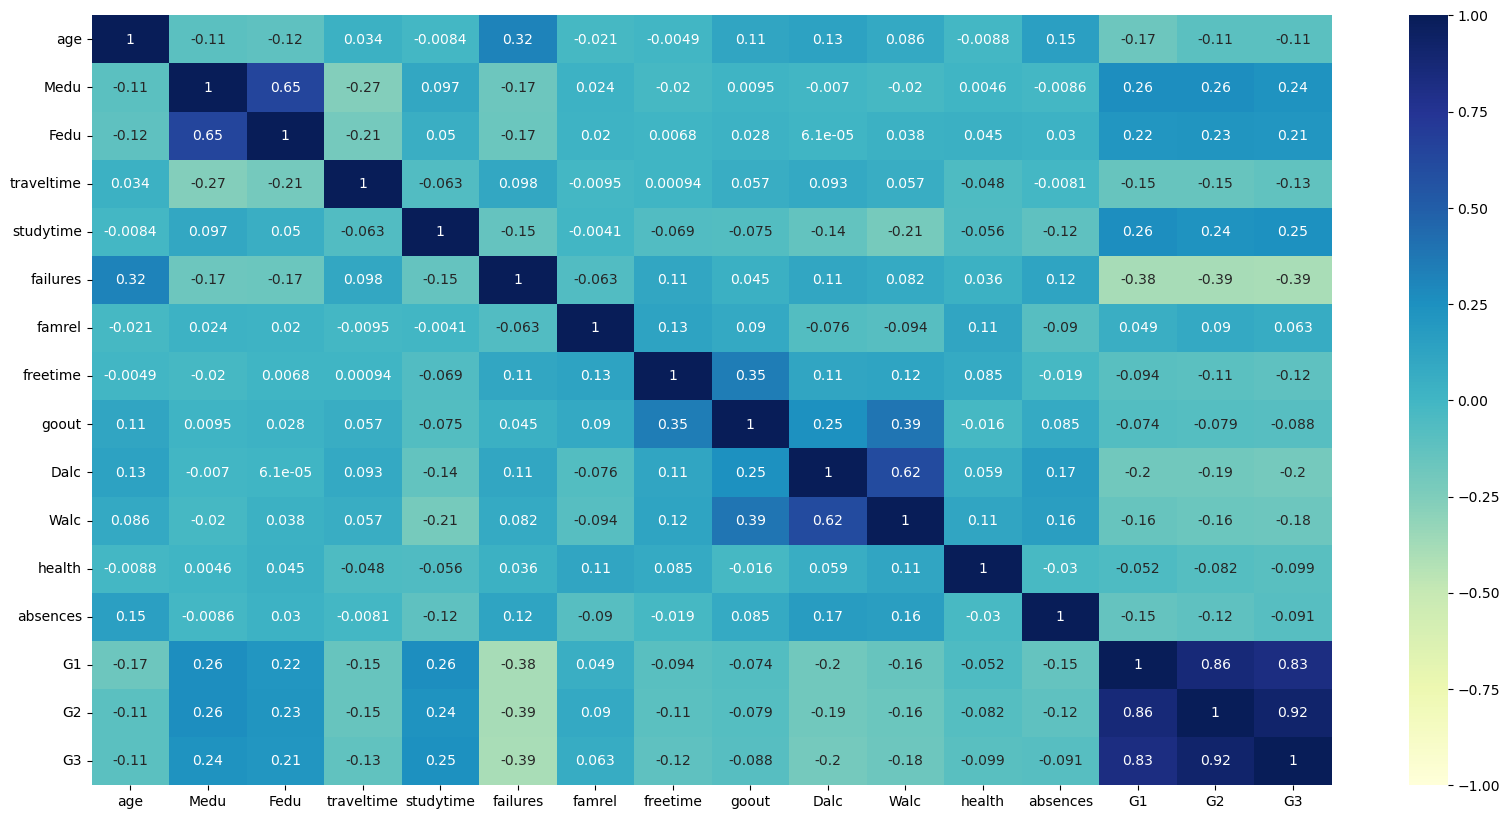

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming alcTable is a DataFrame with mixed data types
# Convert non-numeric values to NaN and then fill NaN with a numeric value
alctable_data = alcTable.copy().drop(columns=['Mjob', 'Fjob', 'reason', 'guardian', 'school', 'sex', 'famsize', 'Pstatus', 'address', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

alcTable_numeric = alctable_data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Calculate the correlation matrix
data = alcTable_numeric.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(20, 10))
pcmp = sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cmap='YlGnBu')

plt.show()


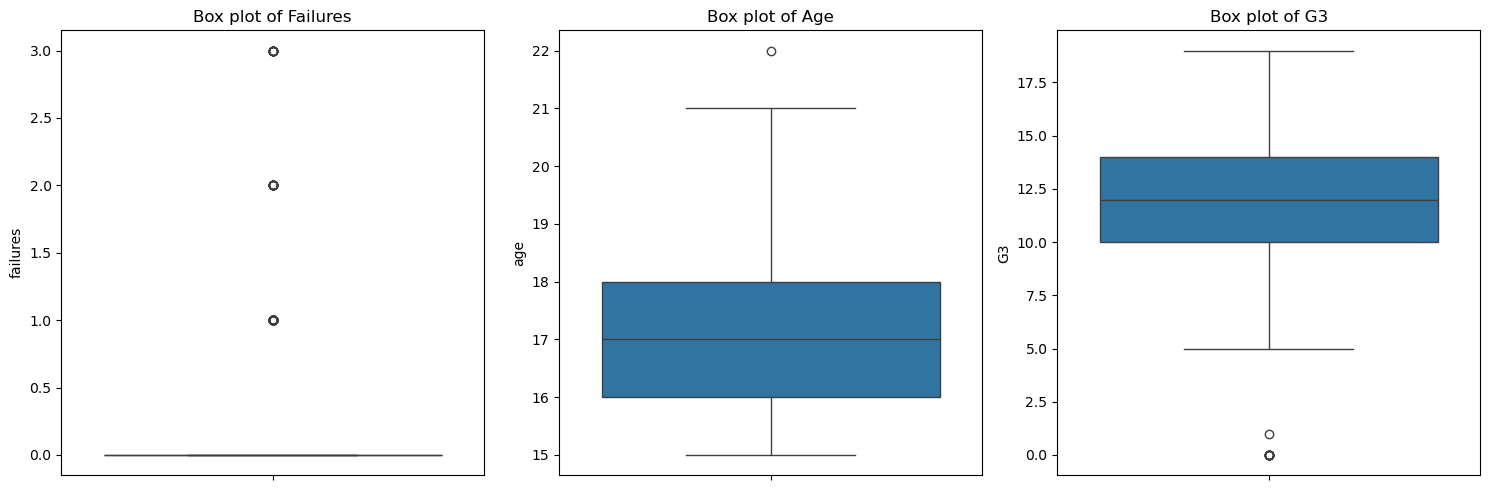

In [5]:
# BOX PLOTS

# Load the data
data = pd.read_csv('../datasets/student-por.csv')

# Creating boxplots
plt.figure(figsize=(15, 5))

# Boxplot for 'failures'
plt.subplot(1, 3, 1)
sns.boxplot(y=data['failures'])
plt.title('Box plot of Failures')

# Boxplot for 'age'
plt.subplot(1, 3, 2)
sns.boxplot(y=data['age'])
plt.title('Box plot of Age')

# Boxplot for 'G3'
plt.subplot(1, 3, 3)
sns.boxplot(y=data['G3'])
plt.title('Box plot of G3')

plt.tight_layout()
plt.show()


Interesting points (greater than +-0.2 correlation):
- failures and age
- failures and grade 

# Initial NN
Manually adjusted the parameters to yield the best score.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('../datasets/student-por.csv')
X = data[['failures', 'age']]
y = data['G3']

# Splitting the dataset into the Training set and Test set
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.2)

# Feature Scaling
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

# Initializing the Neural Network for regression
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), learning_rate_init=0.01, max_iter=1000, solver='sgd', random_state=42)

# Training the Neural Network
mlp.fit(data_train, class_train)

# Making predictions
pred = mlp.predict(data_test)

# Evaluating the model
mse = mean_squared_error(class_test, pred)
r2 = r2_score(class_test, pred)

initial_MSE = mse
initial_R2 = r2

print(f"Mean Square Error: {mse}")
print(f"R2 Score: {r2}")

Mean Square Error: 10.730739391926186
R2 Score: 0.14070697849485891


# hypertuned NN

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.164 (+/-0.121) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.163 (+/-0.109) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'adam'}
0.164 (+/-0.118) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.163 (+/-0.109) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.147 (+/-0.110) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.158 (+/-0.093) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
0.156 (+/-0.104) for {'activation': 'tanh'

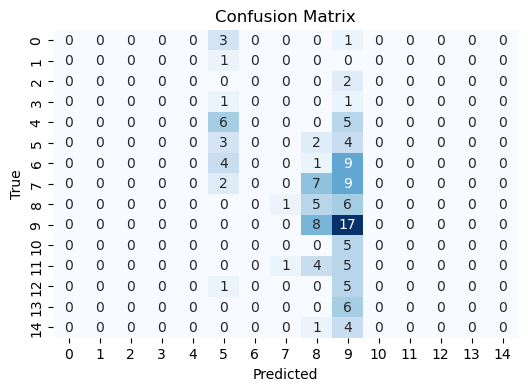

MSE: 10.730739391926186
R2 Score: 0.14070697849485891
Optimized Mean Squared Error: 9.968173322436222
Optimized R2 Score: 0.20177152195421766


In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Define a grid of parameters over which to optimize the MLP
parameter_space = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

mlp = MLPRegressor(max_iter=1000, random_state=42)

# Run grid search with cross-validation
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(data_train, class_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (+/-{std * 2:.3f}) for {params}")

# Making predictions with the best found parameters
pred = clf.predict(data_test)

# Evaluating the model
mse = mean_squared_error(class_test, pred)
r2 = r2_score(class_test, pred)

# Generating confusion matrix
cm = confusion_matrix(class_test, pred.round())  # Assuming a binary classification problem

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f"MSE: {initial_MSE}")
print(f"R2 Score: {initial_R2}")
print(f"Optimized Mean Squared Error: {mse}")
print(f"Optimized R2 Score: {r2}")


Vitually the same results as the previous model training. The high MSE and low R2 suggest that the NN is not performing well. This could be because the model is underfitting, not capturing the data trends appropiately. It can also indicate that there is not a strong correlation between the variables (which is true because these atttributes were linearly correlated in the .40 range).